In [53]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint 
import plotly.express as px


In [54]:
# create meaningful estimators from the data set we have and to select the model that predicts the cancellation


In [55]:
# Import csv file
df = pd.read_csv('../inputs/hotel_bookings.csv')
# explore the first 10 rows 
# Alot of feature engineering and data cleaning for ML training 
df.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   
6                        0                     2       2  ...    No Deposit   
7                        0                     2       2  ...    No Deposit   
8                        0                     3       2  ...    No Deposit   
9                        0                     3       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type    adr  \
0    NaN     NaN                    0     Transient    0.0   
1    NaN     NaN                    0     Transient    0.0   
2    NaN     NaN                    0     Transient   75.0   
3  304.0     NaN                    0     Transient   75.0   
4  240.0     NaN                    0     Transient   98.0   
5  240.0     NaN                    0     Transient   98.0   
6    NaN     NaN                    0     Transient  107.0   
7  303.0     NaN                    0     Transient  103.0   
8  240.0     NaN                    0     Transient   82.0   
9   15.0     NaN                    0     Transient  105.5   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   
5                            0                          1           Check-Out   
6                            0                          0           Check-Out   
7                            0                          1           Check-Out   
8                            0                          1            Canceled   
9                            0                          0            Canceled   

  reservation_status_date  
0     

In [56]:
# explore the shape (rows and columns)
print(f'Number of rows of DataFrame {df.shape[0]}')
print(f'Number of columns of DataFrame {df.shape[1]}')

Number of rows of DataFrame 119390
Number of columns of DataFrame 32


In [57]:
# explore data types and null_values, ML Models only learn numbers not words 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [58]:
# find number of int, float, and object
# must convert all dataset into numbers or bool values
df.dtypes.value_counts()


int64      16
object     12
float64     4
dtype: int64

In [59]:
# collect all dtpyes in 3 classes (object, int, float)
pprint(df.columns.to_series().groupby(df.dtypes).groups)


{dtype('int64'): Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object'),
 dtype('float64'): Index(['children', 'agent', 'company', 'adr'], dtype='object'),
 dtype('O'): Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')}


In [60]:
# create a list of all object/categorical columns and explore 
object_list= list(df.select_dtypes(include=['object']).columns)
df_object = df[object_list]
df_object

hotel arrival_date_month meal country market_segment  \
0       Resort Hotel               July   BB     PRT         Direct   
1       Resort Hotel               July   BB     PRT         Direct   
2       Resort Hotel               July   BB     GBR         Direct   
3       Resort Hotel               July   BB     GBR      Corporate   
4       Resort Hotel               July   BB     GBR      Online TA   
...              ...                ...  ...     ...            ...   
119385    City Hotel             August   BB     BEL  Offline TA/TO   
119386    City Hotel             August   BB     FRA      Online TA   
119387    City Hotel             August   BB     DEU      Online TA   
119388    City Hotel             August   BB     GBR      Online TA   
119389    City Hotel             August   HB     DEU      Online TA   

       distribution_channel reserved_room_type assigned_room_type  \
0                    Direct                  C                  C   
1                    Direct                  C                  C   
2                    Direct                  A                  C   
3                 Corporate                  A                  A   
4                     TA/TO                  A                  A   
...                     ...                ...                ...   
119385                TA/TO                  A                  A   
119386                TA/TO                  E                  E   
119387                TA/TO                  D                  D   
119388                TA/TO                  A                  A   
119389                TA/TO                  A                  A   

       deposit_type customer_type reservation_status reservation_status_date  
0        No Deposit     Transient          Check-Out              2015-07-01  
1        No Deposit     Transient          Check-Out              2015-07-01  
2        No Deposit     Transient          Check-Out              2015-07-02  
3        No Deposit     Transient          Check-Out              2015-07-02  
4        No Deposit     Transient          Check-Out              2015-07-03  
...             ...           ...                ...                     ...  
119385   No Deposit     Transient          Check-Out              2017-09-06  
119386   No Deposit     Transient          Check-Out              2017-09-07  
119387   No Deposit     Transient          Check-Out              2017-09-07  
119388   No Deposit     Transient          Check-Out              2017-09-07  
119389   No Deposit     Transient          Check-Out              2017-09-07  

[119390 rows x 12 columns]

In [61]:
# statistical summary of int/float dtypes columns
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [62]:
### EXPLORE DATA 

In [110]:
pct_canceled = df.is_canceled.value_counts()[1] /  len(df) * 100
print(f'Percentage of canceled hotel reservations {pct_canceled:0.2f}%')

Percentage of canceled hotel reservations 37.04%


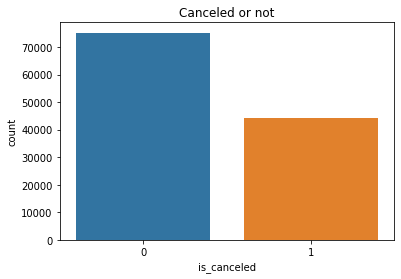

In [63]:
# plot output for cancel 
# Value indicating if the booking was canceled (1) or not (0)
plt.title("Canceled or not")
ax = sns.countplot(x = "is_canceled", data=df)

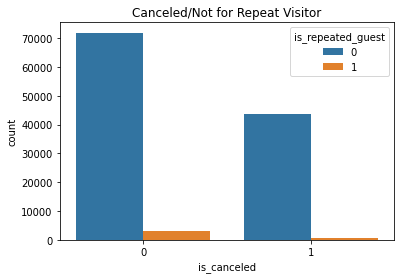

In [64]:
plt.title("Canceled/Not for Repeat Visitor")
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data=df)

# repeated guests do not cancel their reservations.

In [65]:
# pie plot of home country guest that attened booking 
country_data_0 = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data_0.rename(columns={"country": "Number of Guests"}, inplace=True)
country_data_0["Guests in %"] = country_data_0["Number of Guests"] / country_data_0["Number of Guests"].sum()
country_data_0["country"] = country_data_0.index

# pie plot
fig = px.pie(country_data_0,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [66]:
# pie plot of home country guest that canceled (1)
country_data_1 = pd.DataFrame(df.loc[df["is_canceled"] == 1]["country"].value_counts())
country_data_1.rename(columns={"country": "Number of Guests"}, inplace=True)
country_data_1["Guests in %"] = country_data_1["Number of Guests"] / country_data_1["Number of Guests"].sum() * 100
country_data_1["country"] = country_data_1.index

# pie plot
fig = px.pie(country_data_1,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [67]:
# get average daily rate for hotel bookings (ADR)
# based on resort or city hotel and reservec type  and when (seasonal prices)
px.box(data_frame = df[df['is_canceled'] == 0], x = 'arrival_date_month', y = 'adr', color = 'hotel')

# April-October City hotels are higher 
# July-August Resort Hotels are higher 

In [68]:
# finding the mean for City and Resort Average Daily Rate (ADR)
df.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending=False)
# May-August (summer time) prices are higher 

arrival_date_month
August       140.111523
July         126.788013
June         116.672192
May          108.695516
September    105.049657
April        100.380790
October       87.908879
December      81.076776
March         80.679646
November      73.794962
February      73.582276
January       70.361241
Name: adr, dtype: float64

In [69]:
# plot reserved room type and its ADR price for both Resort and City hotels 
px.box(data_frame = df[df['is_canceled'] == 0], x = 'reserved_room_type', y = 'adr', color = 'hotel')

# Type G is the most expensive ADR price 
# Type A is the cheapest ADR price 

In [70]:
# get the total days stayed in and total number of guest 
# boxplot both features
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df['num_guests'] = df['adults'] + df['children'] + df['babies']

df = df.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'company'], axis=1)
px.box(data_frame = df[df['is_canceled'] == 0], x = 'num_guests', y = 'total_nights')

<AxesSubplot:>

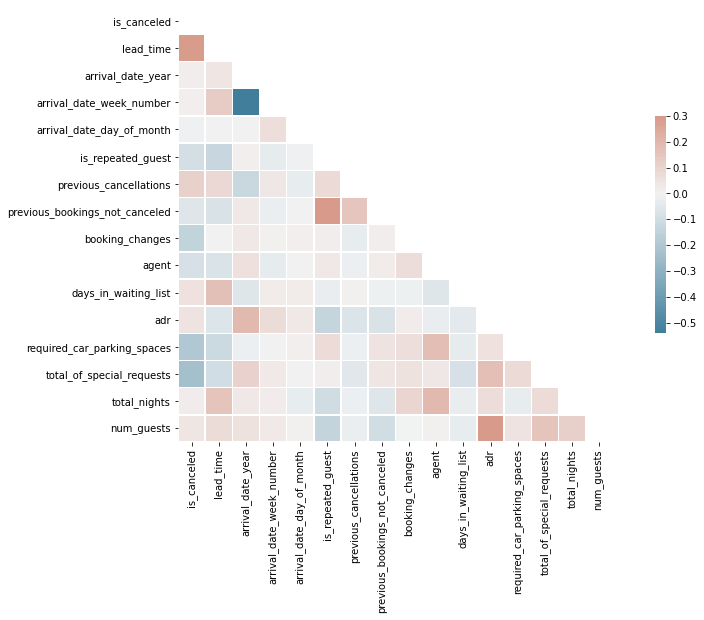

In [71]:
# compute corr array and generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plt heatmap with mask and ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:xlabel='market_segment', ylabel='count'>

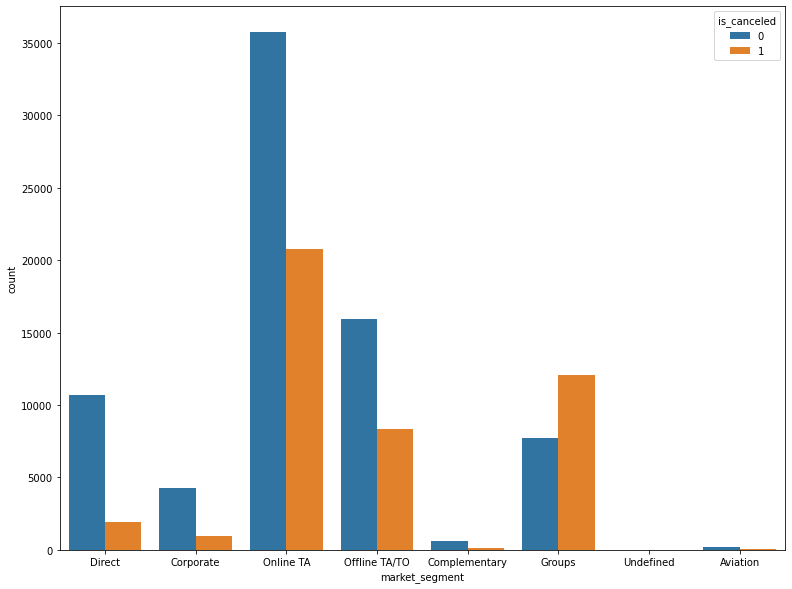

In [113]:
# Total Count for each market segment on Canceled or Not
plt.figure(figsize = (13,10))
sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

# Groups segment have a higher cancelation rate 

In [73]:
# total count for adults, children and total ADR
# get price per capita 
ppc = df["adr"].sum() / df['num_guests'].sum()
print(f"Price per capita ${ppc:0.2f}")


Price per capita $51.74


In [74]:
canceled_pct  = (df["is_canceled"].sum() / df.shape[0]) * 100
print(f'Total percentage canceled {canceled_pct:0.4}%')


Total percentage canceled 37.04%


In [75]:
canceled_pct_resort = (df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum() / df.loc[df["hotel"] == "Resort Hotel"].shape[0]) * 100
print(f'Total percentage canceled for Resort Hotels: {canceled_pct_resort:0.4}%')

Total percentage canceled for Resort Hotels: 27.76%


In [76]:
canceled_pct_city = (df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum() / df.loc[df["hotel"] == "City Hotel"].shape[0]) * 100
print(f'Total percentage canceled for City Hotels: {canceled_pct_city:0.4}%')

Total percentage canceled for City Hotels: 41.73%


In [77]:
# find the absolute value of the highest correlation with the target values
df.corr()["is_canceled"].abs().sort_values(ascending=False)[1:].head(10)

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
Name: is_canceled, dtype: float64

In [78]:
num_df = df[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
             'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent',
             'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

cat_df = df[['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'total_nights', 'num_guests']]


In [79]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month meal country market_segment  ...  agent  \
0                               1   BB     PRT         Direct  ...    NaN   
1                               1   BB     PRT         Direct  ...    NaN   
2                               1   BB     GBR         Direct  ...    NaN   
3                               1   BB     GBR      Corporate  ...  304.0   
4                               1   BB     GBR      Online TA  ...  240.0   
...                           ...  ...     ...            ...  ...    ...   
119385                         30   BB     BEL  Offline TA/TO  ...  394.0   
119386                         31   BB     FRA      Online TA  ...    9.0   
119387                         31   BB     DEU      Online TA  ...    9.0   
119388                         31   BB     GBR      Online TA  ...   89.0   
119389                         29   HB     DEU      Online TA  ...    9.0   

        days_in_waiting_list  customer_type     adr  \
0                          0      Transient    0.00   
1                          0      Transient    0.00   
2                          0      Transient   75.00   
3                          0      Transient   75.00   
4                          0      Transient   98.00   
...                      ...            ...     ...   
119385                     0      Transient   96.14   
119386                     0      Transient  225.43   
119387                     0      Transient  157.71   
119388                     0      Transient  104.40   
119389                     0      Transient  151.20   

       required_car_parking_spaces total_of_special_requests  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

        reservation_status reservation_status_date  total_nights  num_guests  
0                Check-Out              2015-07-01             0         2.0  
1                Check-Out          

In [80]:
print(cat_df.shape[1] + num_df.shape[1])
print(df.shape[1])

28
28


In [81]:
cat_features = df[["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type", "country"]]

num_df = df[[]]
# printing unique values of each column
for col in cat_features.columns:
    print(f"{col}: {cat_features[col].unique()}\n")

hotel: ['Resort Hotel' 'City Hotel']

arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: ['No Deposit' 'Refundable' 'Non Refund']

customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']

country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY

In [82]:
from sklearn.preprocessing import LabelEncoder
col = ['customer_type','meal','arrival_date_month','hotel','market_segment','distribution_channel','reserved_room_type','deposit_type',
              'customer_type','assigned_room_type','reservation_status', 'country']

cat_df = df[col].apply(LabelEncoder().fit_transform)
cat_df


customer_type  meal  arrival_date_month  hotel  market_segment  \
0                   2     0                   5      1               3   
1                   2     0                   5      1               3   
2                   2     0                   5      1               3   
3                   2     0                   5      1               2   
4                   2     0                   5      1               6   
...               ...   ...                 ...    ...             ...   
119385              2     0                   1      0               5   
119386              2     0                   1      0               6   
119387              2     0                   1      0               6   
119388              2     0                   1      0               6   
119389              2     2                   1      0               6   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                          1                   2             0              2   
1                          1                   2             0              2   
2                          1                   0             0              2   
3                          0                   0             0              2   
4                          3                   0             0              2   
...                      ...                 ...           ...            ...   
119385                     3                   0             0              2   
119386                     3                   4             0              2   
119387                     3                   3             0              2   
119388                     3                   0             0              2   
119389                     3                   0             0              2   

        assigned_room_type  reservation_status  country  
0                        2                   1      135  
1                        2                   1      135  
2                        2                   1       59  
3                        0                   1       59  
4                        0                   1       59  
...                    ...                 ...      ...  
119385                   0                   1       15  
119386                   4                   1       56  
119387                   3                   1       43  
119388                   0                   1       59  
119389                   0                   1       43  

[119390 rows x 12 columns]

In [83]:
non_label = df.drop(col, axis=1)
non_label

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0        342               2015                        27   
1                 0        737               2015                        27   
2                 0          7               2015                        27   
3                 0         13               2015                        27   
4                 0         14               2015                        27   
...             ...        ...                ...                       ...   
119385            0         23               2017                        35   
119386            0        102               2017                        35   
119387            0         34               2017                        35   
119388            0        109               2017                        35   
119389            0        205               2017                        35   

        arrival_date_day_of_month  is_repeated_guest  previous_cancellations  \
0                               1                  0                       0   
1                               1                  0                       0   
2                               1                  0                       0   
3                               1                  0                       0   
4                               1                  0                       0   
...                           ...                ...                     ...   
119385                         30                  0                       0   
119386                         31                  0                       0   
119387                         31                  0                       0   
119388                         31                  0                       0   
119389                         29                  0                       0   

        previous_bookings_not_canceled  booking_changes  agent  \
0                                    0                3    NaN   
1                                    0                4    NaN   
2                                    0                0    NaN   
3                                    0                0  304.0   
4                                    0                0  240.0   
...                                ...              ...    ...   
119385                               0                0  394.0   
119386                               0                0    9.0   
119387                               0                0    9.0   
119388                               0                0   89.0   
119389                               0                0    9.0   

        days_in_waiting_list     adr  required_car_parking_spaces  \
0                          0    0.00                            0   
1                          0    0.00                            0   
2                          0   75.00                            0   
3                          0   75.00                            0   
4                          0   98.00                            0   
...                      ...     ...                          ...   
119385                     0   96.14                            0   
119386                     0  225.43                            0   
119387                     0  157.71                            0   
119388                     0  104.40                            0   
119389                     0  151.20                            0   

        total_of_special_requests reservation_status_date  total_nights  \
0                               0              2015-07-01             0   
1                               0              2015-07-01             0   
2                               0              2015-07-02             1   
3                               0              2015-07-02             1   
4                               1              2015-07-03             2   
...                       

In [84]:
# feature enginner the time  to proper timeframe 
non_label['reservation_status_date'] = pd.to_datetime(non_label['reservation_status_date'])
non_label['year'] = non_label['reservation_status_date'].dt.year
non_label['month'] = non_label['reservation_status_date'].dt.month
non_label['day'] = non_label['reservation_status_date'].dt.day

non_label = non_label.drop(['reservation_status_date'], axis=1)


In [85]:
pprint(non_label.columns.to_series().groupby(non_label.dtypes).groups)


{dtype('int64'): Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'year', 'month', 'day'],
      dtype='object'),
 dtype('float64'): Index(['agent', 'adr', 'num_guests'], dtype='object')}


In [86]:
print(non_label.shape)
print(non_label.shape)

non_label.isnull().sum().any()

(119390, 19)
(119390, 19)


True

In [87]:
targets = non_label['is_canceled']
targets.shape

(119390,)

In [90]:
full_df = pd.concat([cat_df, non_label], axis=1)


In [91]:
full_df.isnull().sum() / len(full_df)

customer_type                     0.000000
meal                              0.000000
arrival_date_month                0.000000
hotel                             0.000000
market_segment                    0.000000
distribution_channel              0.000000
reserved_room_type                0.000000
deposit_type                      0.000000
customer_type                     0.000000
assigned_room_type                0.000000
reservation_status                0.000000
country                           0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
days_in_waiting_list              0.000000
adr        

In [92]:
full_df.drop('agent', axis=1)

customer_type  meal  arrival_date_month  hotel  market_segment  \
0                   2     0                   5      1               3   
1                   2     0                   5      1               3   
2                   2     0                   5      1               3   
3                   2     0                   5      1               2   
4                   2     0                   5      1               6   
...               ...   ...                 ...    ...             ...   
119385              2     0                   1      0               5   
119386              2     0                   1      0               6   
119387              2     0                   1      0               6   
119388              2     0                   1      0               6   
119389              2     2                   1      0               6   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                          1                   2             0              2   
1                          1                   2             0              2   
2                          1                   0             0              2   
3                          0                   0             0              2   
4                          3                   0             0              2   
...                      ...                 ...           ...            ...   
119385                     3                   0             0              2   
119386                     3                   4             0              2   
119387                     3                   3             0              2   
119388                     3                   0             0              2   
119389                     3                   0             0              2   

        assigned_room_type  ...  booking_changes  days_in_waiting_list  \
0                        2  ...                3                     0   
1                        2  ...                4                     0   
2                        2  ...                0                     0   
3                        0  ...                0                     0   
4                        0  ...                0                     0   
...                    ...  ...              ...                   ...   
119385                   0  ...                0                     0   
119386                   4  ...                0                     0   
119387                   3  ...                0                     0   
119388                   0  ...                0                     0   
119389                   0  ...                0                     0   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...                          ...                        ...   
119385   96.14                            0                          0   
119386  225.43                            0                          2   
119387  157.71                            0                          4   
119388  104.40                            0                          0   
119389  151.20                            0                          2   

        total_nights  num_guests  year  month  day  
0                  0         2.0  2015      7    1  
1                  0         2.0  2015      7    1  
2                  1         1.0  2015      7    2  
3                  1         1.0  2015      7    2  
4                  2         2.0  2015      7    3  
...              ...         ...   ...    ...  ...

In [94]:
full_df.shape

(119390, 31)

In [95]:
full_df = full_df.dropna()

full_df.shape

(103048, 31)

In [96]:
full_df.isnull().sum().any()

False

In [ ]:
# full_df = full_df.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [97]:
full_df.dtypes

customer_type                       int64
meal                                int64
arrival_date_month                  int64
hotel                               int64
market_segment                      int64
distribution_channel                int64
reserved_room_type                  int64
deposit_type                        int64
customer_type                       int64
assigned_room_type                  int64
reservation_status                  int64
country                             int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               

In [98]:
targets = full_df['is_canceled']
features = full_df.drop(['is_canceled'], axis=1)

print(targets.shape)
print(features.shape)

(103048,)
(103048, 30)


In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

<AxesSubplot:>

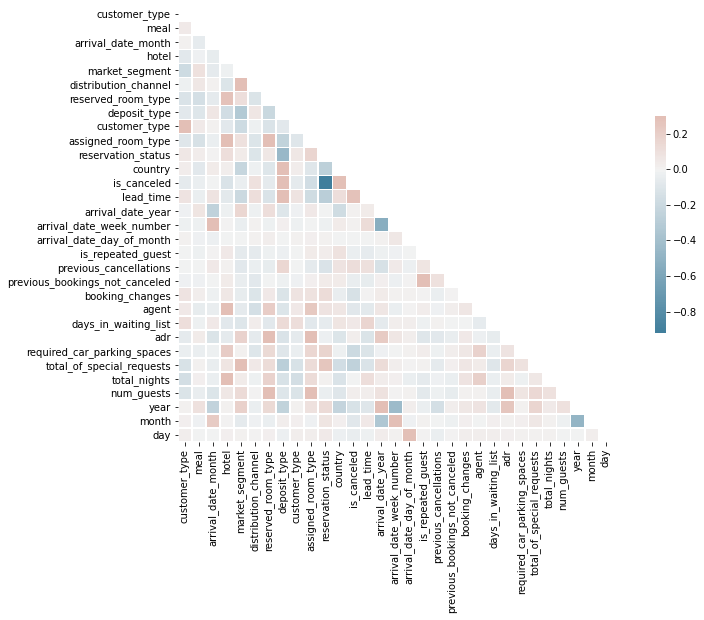

In [100]:
# compute corr array and generate a mask for the upper triangle
corr = full_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plt heatmap with mask and ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})